# 思路：选择龙头行业的龙头个股，做强势高开的买点，即当日放量拉升6%时介入，观察之后5个交易日，若均不低于5日线，则按照第五日收盘价结算，若存在某日低于五日线，则按照当日五日线价格结算。

# 函数定义

In [2]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%pwd

'C:\\Users\\thinkpad\\Desktop\\实习\\锐天'

In [5]:
close_px = pd.read_csv('technical_data_interview.csv', parse_dates=True, index_col=0)

In [6]:
close_px["date"][2499000]

'2016-03-01'

In [7]:
stock_1 = close_px[close_px.index.isin(['002271-SZ-stock'])]
stock_1

,date,BARRID,Loading_BETA,Loading_MOMENTUM,Loading_SIZE,Loading_EARNYILD,Loading_RESVOL,Loading_GROWTH,Loading_BTOP,Loading_LEVERAGE,...,WindCode,Open,High,Low,Close,Volume,Amount,AdjClose,mktcap,Raw_CC
Uid,,,,,,,,,,,,,,,,,,,,,
002271-SZ-stock,2010-01-05,CHNDGZ1,0.354,2.464,-1.998,-1.983,1.687,1.221,-1.483,-0.789,...,002271.SZ,53.50,54.90,52.50,54.35,2104814.0,112846.6123,82.31,1.467810e+05,0.025472
002271-SZ-stock,2010-01-06,CHNDGZ1,0.337,2.930,-1.979,-1.980,1.661,1.220,-1.483,-0.785,...,002271.SZ,54.20,54.21,52.51,53.68,1351280.0,72381.3297,81.30,1.449716e+05,-0.012328
002271-SZ-stock,2010-01-07,CHNDGZ1,0.359,2.968,-1.984,-1.978,1.608,1.222,-1.483,-0.790,...,002271.SZ,53.90,59.05,53.90,58.25,3055882.0,175797.1752,88.22,1.573136e+05,0.085134
002271-SZ-stock,2010-01-08,CHNDGZ1,0.176,3.198,-1.887,-1.978,1.914,1.222,-1.482,-0.791,...,002271.SZ,58.00,59.64,56.39,59.10,2099133.0,122390.4479,89.50,1.596091e+05,0.014592
002271-SZ-stock,2010-01-11,CHNDGZ1,0.179,2.981,-1.868,-1.980,1.824,1.228,-1.485,-0.798,...,002271.SZ,58.00,64.76,57.13,62.88,2422349.0,149972.7592,95.23,1.698176e+05,0.063959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
002271-SZ-stock,2018-12-24,CHNDGZ1,1.542,-0.464,-0.153,0.041,0.506,0.853,-0.896,-0.375,...,002271.SZ,14.28,14.72,14.15,14.34,12510812.0,180115.8290,312.62,1.424643e+06,0.007730
002271-SZ-stock,2018-12-25,CHNDGZ1,1.530,-0.356,-0.152,0.045,0.465,0.853,-0.892,-0.370,...,002271.SZ,14.11,14.25,13.74,14.16,12162735.0,170448.5820,308.69,1.406761e+06,-0.012552
002271-SZ-stock,2018-12-26,CHNDGZ1,1.540,-0.394,-0.159,0.045,0.470,0.851,-0.889,-0.367,...,002271.SZ,14.10,14.29,13.81,13.91,10389749.0,144964.2060,303.24,1.381924e+06,-0.017655


In [12]:
def find_stock(code):
    if code[0:3] == "600" or code[0:3] == "601" or code[0:3] == "603" or code[0:3] == "688":
        str_1 = code + "-SH-stock"
        table = close_px[close_px.index.isin([str_1])]
        table.columns=map(lambda x: "F"+str(x),range(32))
        return table
    elif code[0:3] == "300" or code[0:3] == "000" or code[0:3] == "002" or code[0:3] == "003":
        str_2 =  code + "-SZ-stock"
        table = close_px[close_px.index.isin([str_2])]
        table.columns=map(lambda x: "F"+str(x),range(32))
        return table
    else:
        return "error"

table = find_stock("601012")
print(table)


                         F0       F1     F2     F3     F4     F5     F6  \
Uid                                                                       
601012-SH-stock  2013-03-19  CHNESO1  0.152 -0.814 -1.633 -1.163  1.390   
601012-SH-stock  2013-03-20  CHNESO1  0.108 -0.936 -1.655 -1.167  1.358   
601012-SH-stock  2013-03-21  CHNESO1  0.262 -0.943 -1.636 -1.165  1.343   
601012-SH-stock  2013-03-22  CHNESO1  0.273 -1.037 -1.629 -1.158  1.301   
601012-SH-stock  2013-03-25  CHNESO1  0.265 -1.016 -1.655 -1.157  1.295   
...                     ...      ...    ...    ...    ...    ...    ...   
601012-SH-stock  2018-12-24  CHNESO1  0.277  0.827  0.755 -0.628  1.829   
601012-SH-stock  2018-12-25  CHNESO1  0.304  0.892  0.777 -0.623  1.833   
601012-SH-stock  2018-12-26  CHNESO1  0.293  1.012  0.780 -0.624  1.759   
601012-SH-stock  2018-12-27  CHNESO1  0.298  1.309  0.787 -0.626  1.697   
601012-SH-stock  2018-12-28  CHNESO1  0.333  1.271  0.753 -0.630  1.649   

                    F7  

In [13]:
for x in close_px.columns:
    print(x)
close_px.columns=map(lambda x: "F"+str(x),range(32))

date
BARRID
Loading_BETA
Loading_MOMENTUM
Loading_SIZE
Loading_EARNYILD
Loading_RESVOL
Loading_GROWTH
Loading_BTOP
Loading_LEVERAGE
Loading_LIQUIDTY
Loading_SIZENL
COUNTRY
LOCALID
IND
INDNAME
HBETA
PBETA
TRISK%
SRISK%
YLD%
Loading_SRISKRATIO
WindCode
Open
High
Low
Close
Volume
Amount
AdjClose
mktcap
Raw_CC


In [14]:
print(close_px)

                         F0       F1     F2     F3     F4     F5     F6  \
Uid                                                                       
600612-SH-stock  2010-01-05  CHNAAA2 -0.049  0.396 -1.717 -1.109  1.148   
000012-SZ-stock  2010-01-05  CHNAAB2  0.833  0.639 -0.502 -0.485  0.956   
600610-SH-stock  2010-01-05  CHNAAC2 -1.008  1.007 -2.103 -1.234 -0.441   
000513-SZ-stock  2010-01-05  CHNAAD2 -1.914  1.599 -1.195 -0.551  0.438   
600648-SH-stock  2010-01-05  CHNAAE2 -0.043 -0.929 -0.747  1.986  0.114   
...                     ...      ...    ...    ...    ...    ...    ...   
300721-SZ-stock  2018-12-28  CHNFZV1  0.393 -1.575 -2.871 -0.801  0.756   
603970-SH-stock  2018-12-28  CHNFZW1 -0.259 -0.959 -2.460 -0.584  0.772   
002864-SZ-stock  2018-12-28  CHNFZX1  0.994 -0.643 -2.299 -1.197  1.233   
300723-SZ-stock  2018-12-28  CHNFZY1  1.752 -0.379 -1.856 -0.755 -0.601   
603619-SH-stock  2018-12-28  CHNFZZ1  1.127 -1.976 -1.432 -1.014  1.932   

                    F7  

In [15]:
industry = close_px.groupby(['F15'])[["F7"]].mean()

industry_series = industry.index

In [16]:
tr = close_px[close_px.F15.isin(["LEISLUX"])]

# 行业GROWTH指标

In [23]:
def industry_average_performance(industry_name):
    tr = close_px[close_px.F15.isin([industry_name])]  
    tr_1 = tr[tr.F0.isin(["2010-01-05"])]
    result = tr.groupby(['F0'])[['F7']].mean()
    return result

#挑选行业龙头
def select_dragon_head(industry):
    industry_info = close_px[close_px.F15.isin([industry])]
    tr_1 = industry_info[industry_info.F0.isin(["2010-01-05"])]
    if len(tr_1) <= 6:
        return "ok"
    else: 
        temp = tr_1.F30
        lis = []
        for i in range(len(temp)):
            lis.append(temp[i])   
    lis.sort()
    li = lis[-7:]
    temp = pd.DataFrame(temp)
    index_list = []
    for i in range(len(li)):
        a = industry_info[(industry_info.F30 == li[i])].index
        index_list.append(a[0])
    return index_list

def industry_dragon_performance(industry_name):
    tr = close_px[close_px.F15.isin([industry_name])]  
    tr_1 = tr[tr.F0.isin(["2010-01-05"])]
    if len(tr_1) <=6:
        result = tr.groupby(['F0'])[['F7']].mean()
    else:
        industry_dragon = select_dragon_head(industry_name)
        tr_2 = tr[tr.index.isin(industry_dragon)]
        
        result = tr_2.groupby(['F0'])[['F7']].mean()
    return result

    


In [24]:
for i in range(len(industry_series)):
    print(industry_series[i])

AERODEF
AIRLINE
AUTO
BANKS
BEV
BLDPROD
CHEM
CNSTENG
COMSERV
CONMAT
CONSSERV
DVFININS
ELECEQP
ENERGY
FOODPROD
HDWRSEMI
HEALTH
HOUSEDUR
INDCONG
LEISLUX
MACH
MARINE
MATERIAL
MEDIA
MTLMIN
PERSPRD
RDRLTRAN
REALEST
RETAIL
SOFTWARE
TRDDIST
UTILITIE


<Figure size 504x360 with 0 Axes>

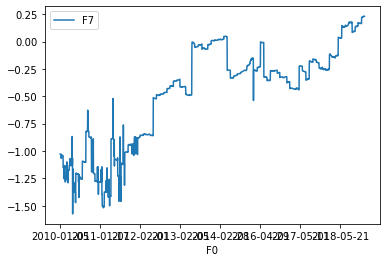

In [25]:
temp_1 = industry_dragon_performance("AIRLINE")
plt.figure(figsize=(7, 5))
k = len(temp_1)
sd = pd.Series(range(k),index = range(k))
temp_1.plot() 

# 行业价格趋势指标

In [26]:
def industry_average_price(industry_name):
    tr = close_px[close_px.F15.isin([industry_name])]  
    tr_1 = tr[tr.F0.isin(["2010-01-05"])]
    result = tr.groupby(['F0'])[['F26']].mean()
    return result

#挑选行业龙头
def select_dragon_head(industry):
    industry_info = close_px[close_px.F15.isin([industry])]
    tr_1 = industry_info[industry_info.F0.isin(["2010-01-05"])]
    if len(tr_1) <= 6:
        return "ok"
    else: 
        temp = tr_1.F30
        lis = []
        for i in range(len(temp)):
            lis.append(temp[i])   
    lis.sort()
    li = lis[-7:]
    temp = pd.DataFrame(temp)
    index_list = []
    for i in range(len(li)):
        a = industry_info[(industry_info.F30 == li[i])].index
        index_list.append(a[0])
    return index_list

def industry_dragon_price(industry_name):
    tr = close_px[close_px.F15.isin([industry_name])]  
    tr_1 = tr[tr.F0.isin(["2010-01-05"])]
    if len(tr_1) <=6:
        result = tr.groupby(['F0'])[['F26']].mean()
    else:
        industry_dragon = select_dragon_head(industry_name)
        tr_2 = tr[tr.index.isin(industry_dragon)]
        result = tr_2.groupby(['F0'])[['F26']].mean()
    return result

# 板块综合性考虑

In [27]:
def industry_price_index(industry):
    try:
         return industry_dragon_price(industry)
    except:
         return industry_average_price(industry)
        
def industry_performance_index(industry):
    try:
         return industry_dragon_performance(industry)
    except:
         return industry_average_performance(industry)
        
        




In [28]:
def draw_industry(name):
    temp_1 = industry_performance_index(name)
    plt.figure(figsize=(7, 5))
    k = len(temp_1)
    sd = pd.Series(range(k),index = range(k))
    temp_1.plot()
    return 0

AERODEF 0
AIRLINE 0
AUTO 0
BANKS 0
BEV 0
BLDPROD 0
CHEM 0
CNSTENG 0
COMSERV 0
CONMAT 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


CONSSERV 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


DVFININS 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


ELECEQP 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


ENERGY 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


FOODPROD 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


HDWRSEMI 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


HEALTH 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


HOUSEDUR 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


INDCONG 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


LEISLUX 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


MACH 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


MARINE 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


MATERIAL 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


MEDIA 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


MTLMIN 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


PERSPRD 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


RDRLTRAN 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


REALEST 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


RETAIL 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


SOFTWARE 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


TRDDIST 0
UTILITIE 0


<ipython-input-28-a84ffcec6714>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 5))
C:\Users\thinkpad\anacoda\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 504x360 with 0 Axes>

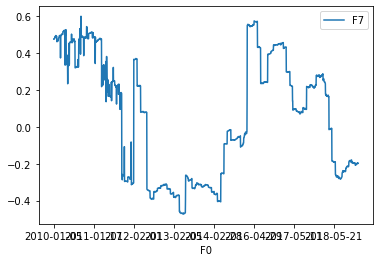

<Figure size 504x360 with 0 Axes>

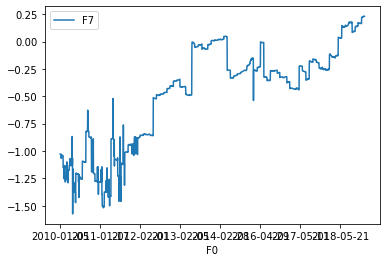

<Figure size 504x360 with 0 Axes>

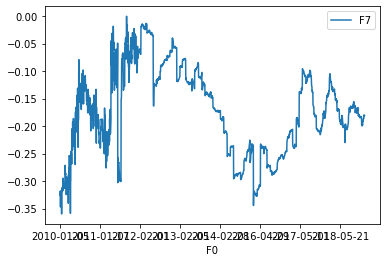

<Figure size 504x360 with 0 Axes>

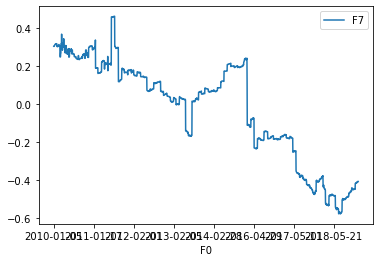

<Figure size 504x360 with 0 Axes>

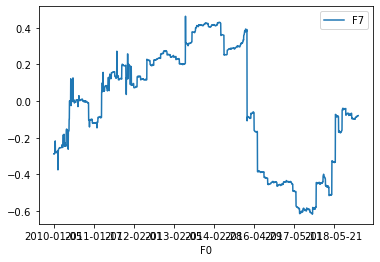

<Figure size 504x360 with 0 Axes>

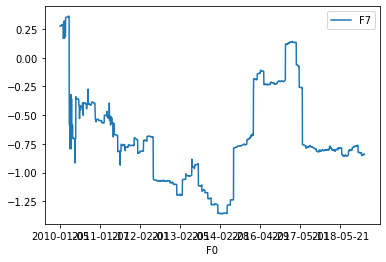

<Figure size 504x360 with 0 Axes>

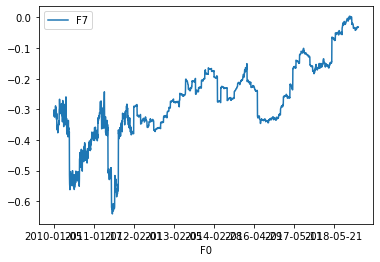

<Figure size 504x360 with 0 Axes>

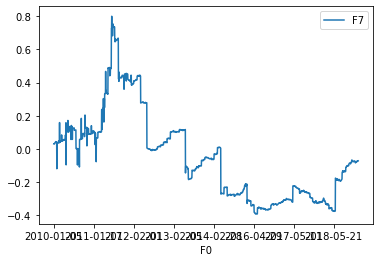

<Figure size 504x360 with 0 Axes>

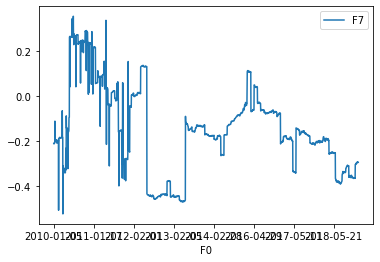

<Figure size 504x360 with 0 Axes>

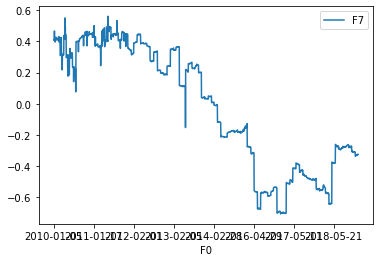

<Figure size 504x360 with 0 Axes>

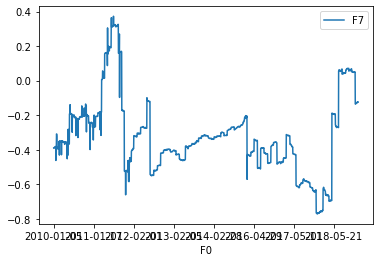

<Figure size 504x360 with 0 Axes>

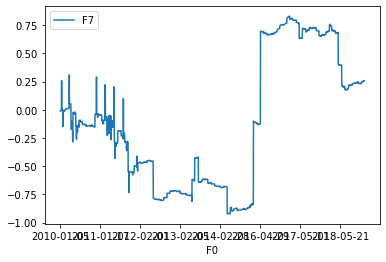

<Figure size 504x360 with 0 Axes>

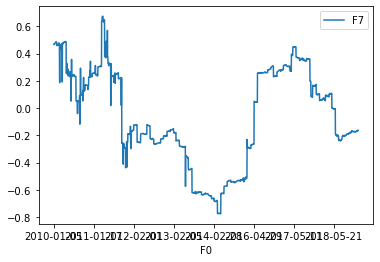

<Figure size 504x360 with 0 Axes>

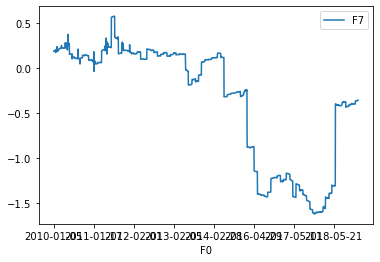

<Figure size 504x360 with 0 Axes>

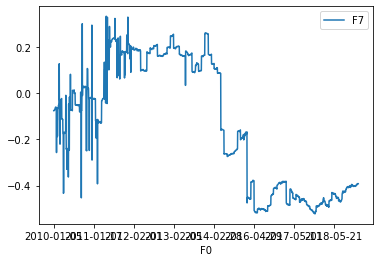

<Figure size 504x360 with 0 Axes>

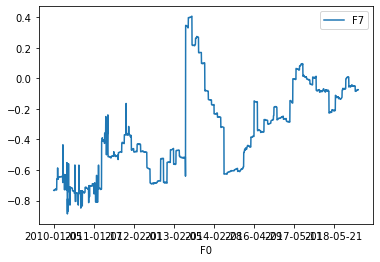

<Figure size 504x360 with 0 Axes>

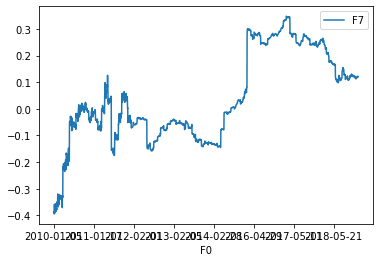

<Figure size 504x360 with 0 Axes>

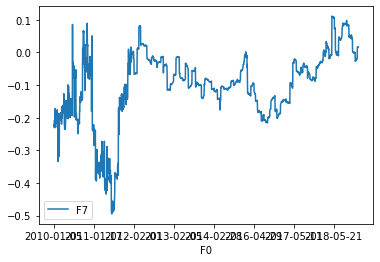

<Figure size 504x360 with 0 Axes>

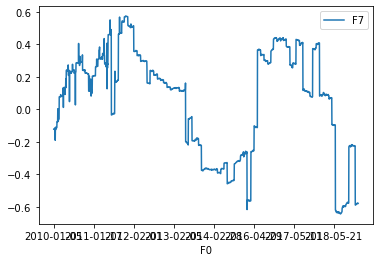

<Figure size 504x360 with 0 Axes>

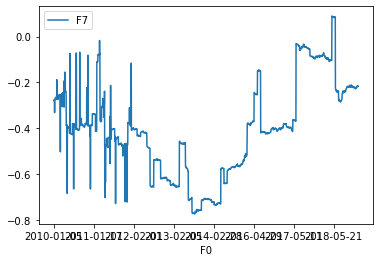

<Figure size 504x360 with 0 Axes>

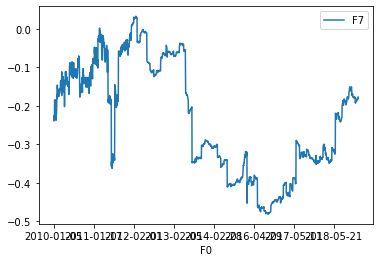

<Figure size 504x360 with 0 Axes>

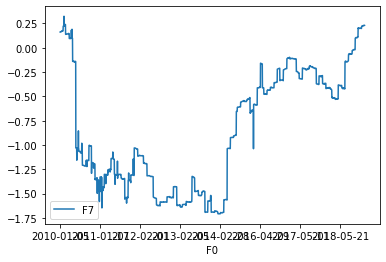

<Figure size 504x360 with 0 Axes>

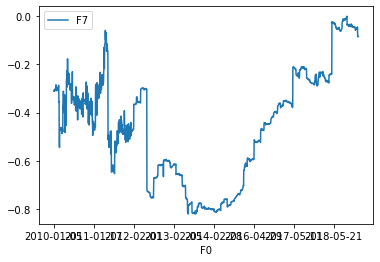

<Figure size 504x360 with 0 Axes>

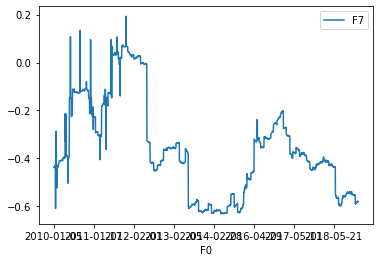

<Figure size 504x360 with 0 Axes>

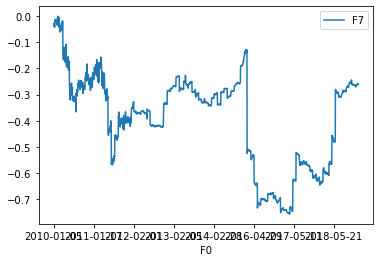

<Figure size 504x360 with 0 Axes>

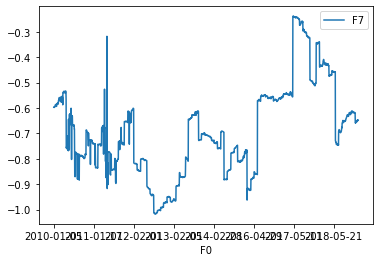

<Figure size 504x360 with 0 Axes>

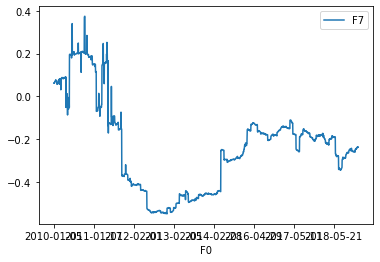

<Figure size 504x360 with 0 Axes>

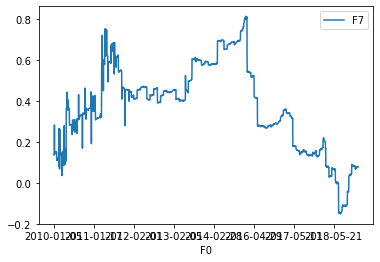

<Figure size 504x360 with 0 Axes>

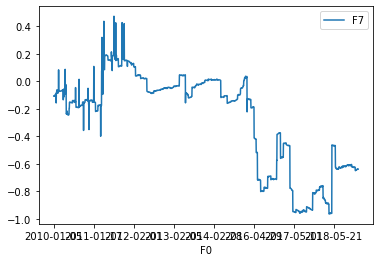

<Figure size 504x360 with 0 Axes>

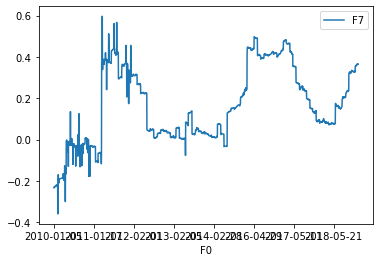

<Figure size 504x360 with 0 Axes>

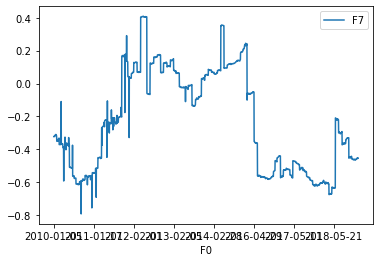

<Figure size 504x360 with 0 Axes>

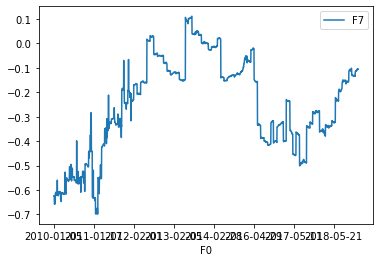

In [29]:
for i in range(len(industry_series)):
    print(industry_series[i],draw_industry(industry_series[i]))

# 趋势判断函数&板块挑选

In [35]:
def if_price_trend(industry_name):
    ind = industry_price_index(industry_name)
    ret=ind.pct_change() 
    ret.columns=["SimpleReturn"]
    res=pd.concat([ind,ret],axis=1)
    total_list = []
    total_var = []
    for i in range(15,len(ind)):
        sum = 0
        lis = []
        for j in range(13):
            sum += res["SimpleReturn"][i-j]
            lis.append(res["SimpleReturn"][i-j])
        average_rate = sum/13
        var = np.var(lis)*10000
        total_list.append(average_rate)
        total_var.append(var)
    return total_list,total_var
            
def select(list_1,list_2):
    sum = 0
    index = []
    for j in range(len(list_2)):
        sum += list_2[j]
    sum = sum/len(list_2)
    for i in range(11,len(list_1)):
        temp = 0
        for j in range(10):
            temp += list_1[i-j]
        if temp >= 7*0.005 or (temp >0 and list_2[i] <1.5*sum):
            index.append(i)
    return index

def select_price_date(industry):
    list_1,list_2 = if_price_trend(industry)
    lis_0 = industry_price_index(industry)
    lis_1 = select(list_1,list_2)
    lis_2 = []
    ind = industry_price_index(industry)
    for i in range(len(ind)):
        if i in lis_1:
            lis_2.append(lis_0.index[i])
    return lis_2

lis_0 = select_price_date("CHEM")


In [36]:
def if_performance_trend(industry_name):
    ind = industry_performance_index(industry_name)
    ret=ind.pct_change() 
    ret.columns=["SimpleReturn"]
    res=pd.concat([ind,ret],axis=1)
    total_list = []
    total_var = []
    for i in range(15,len(ind)):
        sum = 0
        lis = []
        for j in range(13):
            sum += res["SimpleReturn"][i-j]
            lis.append(res["SimpleReturn"][i-j])
        average_rate = sum/13
        var = np.var(lis)*10000
        total_list.append(average_rate)
        total_var.append(var)
    return total_list,total_var
            
def select(list_1,list_2):
    sum = 0
    index = []
    for j in range(len(list_2)):
        sum += list_2[j]
    sum = sum/len(list_2)
    for i in range(31,len(list_1)):
        temp = 0
        for j in range(30):
            temp += list_1[i-j]
        if temp >= 0.1 or (temp >0 and list_2[i] <1.5*sum):
            index.append(i)
    return index

def select_performance_date(industry):
    list_1,list_2 = if_performance_trend(industry)
    lis_0 = industry_performance_index(industry)
    lis_1 = select(list_1,list_2)
    lis_2 = []
    ind = industry_performance_index(industry)
    for i in range(len(ind)):
        if i in lis_1:
            lis_2.append(lis_0.index[i])
    return lis_2

lis_0 = select_performance_date("CHEM")


In [37]:
def choose_industry_trade_date(industry_name):
    list_1 = select_performance_date(industry_name)
    list_2 = select_price_date(industry_name)
    list_3 = [val for val in list_1 if val in list_2]
    return list_3

# 强势高开买点判断

In [38]:
#强势拉升
def volume_price(code):
    gf = find_stock(code)
    lis = []
    for i in range(6,len(gf)):
        if gf.F27[i] > ((gf.F27[i-1]+gf.F27[i-2]+gf.F27[i-3]+gf.F27[i-4])/4)*1.35:
            if ((gf.F24[i]-gf.F26[i-1])/gf.F26[i-1]) > 0.06:
                lis.append(gf.F0[i])
    return lis
#强势拉升后尾盘回落              
def volume_price_exception(code):
    gf = find_stock(code)
    lis = []
    for i in range(6,len(gf)):
        if gf.F27[i] > ((gf.F27[i-1]+gf.F27[i-2]+gf.F27[i-3]+gf.F27[i-4])/4)*1.2:
            if ((gf.F24[i]-gf.F26[i-1])/gf.F26[i-1]) > 0.06:
                if ((gf.F26[i]-gf.F26[i-1])/gf.F26[i-1])<0.06:
                    lis.append(gf.F0[i])
    return lis

                


In [39]:
print(volume_price("000725"))

['2010-02-09', '2010-06-09', '2010-10-18', '2010-10-22', '2011-03-07', '2011-06-30', '2011-08-15', '2012-01-10', '2012-09-14', '2012-10-18', '2012-10-31', '2012-12-05', '2012-12-24', '2013-03-06', '2013-03-07', '2013-05-23', '2013-07-16', '2013-09-11', '2013-12-25', '2014-02-20', '2014-02-24', '2014-09-16', '2014-10-10', '2014-12-03', '2014-12-05', '2016-11-07', '2017-01-03', '2017-01-12', '2017-04-21', '2017-05-16', '2017-09-26', '2017-09-28', '2017-10-25', '2017-10-30', '2017-11-21', '2018-01-09', '2018-05-03', '2018-07-12', '2018-07-24', '2018-08-27', '2018-10-22']


# 对个股进行处理

In [40]:
stock_1 = close_px[close_px.index.isin(['000725-SZ-stock'])]
s_i = stock_1.F15[0]
trade_date = choose_industry_trade_date(s_i)
high_date = volume_price("000725")
final_date = [val for val in high_date if val in trade_date]
print(final_date)

['2011-03-07', '2013-03-06', '2013-07-16', '2013-09-11', '2014-02-20', '2014-02-24', '2014-10-10', '2017-09-26', '2017-09-28', '2017-10-25', '2017-10-30', '2017-11-21', '2018-08-27']


# 每次交易成本扣除税费千分之1.2

In [64]:
def macd_10(code):
    sd = find_stock(code).F26
    sd_1 = find_stock(code).F26
    sd_2 = find_stock(code).F26
    for i in range(11,len(sd)):
        if sd[i] == None:
            sd_1[i] = sd[i-1]
    for i in range(11,len(sd)):
        sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5]+sd_1[i-6]+sd_1[i-7]+sd_1[i-8]+sd_1[i-9]+sd_1[i-10])/10
    return sd_2
        
def trade_date_stock(code):
    if code[0:3] == "600" or code[0:3] == "601" or code[0:3] == "603" or code[0:3] == "688":
        std_code = code + "-SH-stock"
    elif code[0:3] == "300" or code[0:3] == "000" or code[0:3] == "002" or code[0:3] == "003":
        std_code =  code + "-SZ-stock"
    stock_1 = close_px[close_px.index.isin([std_code])]
    s_i = stock_1.F15[0]
    trade_date = choose_industry_trade_date(s_i)
    high_date = volume_price(code)
    final_date = [val for val in high_date if val in trade_date]
    index_list = []
    std_code = find_stock(code)
    std_code.index = range(1,len(std_code)+1)
    del_list = []
    for x in final_date:
        index_1 = std_code[std_code.F0.isin([x])].index
        index_list.append(index_1[0])
        if ((index_1[0] - 1) in index_list) or ((index_1[0] - 2) in index_list) or ((index_1[0] - 3) in index_list) or ((index_1[0] - 4) in index_list) or ((index_1[0] - 5) in index_list):
            del_list.append(x)
    final_date = [val for val in final_date if val not in del_list]
    for x in final_date:
        if x == '2016-03-01' or x == '2016-03-02' or x == '2016-03-03' or x == '2016-03-04' or x == '2016-03-05' or x =="2016-03-06":
            final_date.remove(x)

    return final_date
    
    
    

def specific_stock(code):
    final_date = trade_date_stock(code)
    rate = []
    macd = macd_10(code)
    std_code = find_stock(code)
    std_code.index = range(1,len(std_code)+1)
    index_list = []
    for x in final_date:
        sd = std_code[std_code.F0.isin([x])]
        index_1 = std_code[std_code.F0.isin([x])].index
        index_list.append(index_1[0])
        if ((index_1[0] - 1) in index_list) or ((index_1[0] - 2) in index_list) or ((index_1[0] - 3) in index_list) or ((index_1[0] - 4) in index_list) or ((index_1[0] - 5) in index_list):
            continue
        else:
            f_c = std_code[std_code.index.isin([index_1[0]-1])].F26[index_1[0]-1]
            c_1 = std_code[std_code.index.isin([index_1[0]+1])].F25
            r_1 = std_code[std_code.index.isin([index_1[0]+1])].F31
            c_2 = std_code[std_code.index.isin([index_1[0]+2])].F25
            r_2 = std_code[std_code.index.isin([index_1[0]+2])].F31
            c_3 = std_code[std_code.index.isin([index_1[0]+3])].F25
            r_3 = std_code[std_code.index.isin([index_1[0]+3])].F31
            c_4 = std_code[std_code.index.isin([index_1[0]+4])].F25
            r_4 = std_code[std_code.index.isin([index_1[0]+4])].F31
            c_5 = std_code[std_code.index.isin([index_1[0]+5])].F25
            r_5 = std_code[std_code.index.isin([index_1[0]+5])].F31
            if c_1[index_1[0]+1] < macd[index_1[0]+1]:
                ad_1 = -(f_c*1.06-c_1[index_1[0]+1])/(f_c*1.06)
                rate.append(ad_1)
                continue
            if c_2[index_1[0]+2] < macd[index_1[0]+2]:
                ad_2 = (-(f_c*1.06-c_2[index_1[0]+2])/(f_c*1.06))
                rate.append(ad_2)
                continue
            if c_3[index_1[0]+3] < macd[index_1[0]+3]: 
                ad_3 = (-(f_c*1.06-c_3[index_1[0]+3])/(f_c*1.06))
                rate.append(ad_3)
                continue
            if c_4[index_1[0]+4] < macd[index_1[0]+4]: 
                ad_4 = (-(f_c*1.06-c_4[index_1[0]+4])/(f_c*1.06))
                rate.append(ad_4)
                continue
            if c_5[index_1[0]+5] < macd[index_1[0]+5]: 
                ad_5 = (-(f_c*1.06-c_5[index_1[0]+5])/(f_c*1.06))
                rate.append(ad_5)
                continue
            else:
                ad_6 = ((std_code[std_code.index.isin([index_1[0]+5])].F26.values[0]-f_c*1.06)/f_c*1.06)
                rate.append(ad_6)
                continue
            
    # 扣税费
    if len(rate) >=1:
        for i in range(len(rate)):
            rate[i] -= 0.0012
     
    return rate

In [65]:
print(specific_stock("002594"))

<ipython-input-64-21b31fb7ce82>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd = macd_10(code)
<ipython-input-64-21b31fb7ce82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5]+sd_1[i-6]+sd_1[i-7]+sd_1[i-8]+sd_1[i-9]+sd_1[i-10])/10


[0.018455549231644698, 0.07291221532091076, 0.3393788617886176, -0.020466944080260188, 0.16891084337349385, -0.05780377358490574, -0.014185718202437645, 0.0043952729319075975, 0.22099746835443024, 0.09978813838550239, 0.029483681214421204, -0.03382433441684871, 0.1077531914893616, -0.0224836044873086]


In [67]:
def cal_avg_rate(code):
    li = specific_stock(code)
    sum = 0
    for i in range(len(li)):
        sum +=li[i]
    if len(li) > 0:
        return sum/len(li)
    else:
        return 0
print(specific_stock("300315"))

<ipython-input-64-21b31fb7ce82>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd = macd_10(code)
<ipython-input-64-21b31fb7ce82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5]+sd_1[i-6]+sd_1[i-7]+sd_1[i-8]+sd_1[i-9]+sd_1[i-10])/10


[-0.1097535820776236, -0.02117006681737623, 0.02847222731439035, -0.052869692902818524, 0.02524854368932022, -0.02667648692653956]


#  第一部分： 因子评估

# 挑选当前交易日成交量前十的大盘股进行回测，计算平均每次操作的收益率

In [68]:
stock_selection = ["300201","002371","601012","300059","600031","600516","002594","000858","002714","002475"]
avg_rev = []
for x in stock_selection:
    avg_rev.append(cal_avg_rate(x))
print(avg_rev)    
    


<ipython-input-64-21b31fb7ce82>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd = macd_10(code)
<ipython-input-64-21b31fb7ce82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5]+sd_1[i-6]+sd_1[i-7]+sd_1[i-8]+sd_1[i-9]+sd_1[i-10])/10


[0.104741824086866, 0.03572143878482522, 0.023831290833504815, 0.02064056970353664, -0.037584041896015316, -0.006103620555403727, 0.06523648909418064, -0.009688780448855641, 0.0379398131797656, 0.002575367687234051]


# 在股票列表中随机抽取序号为350-450的股票，统计平均每次操作收益为正的概率

In [69]:
fdg = close_px[close_px.F0.isin(['2010-01-05'])].index
neg = 0
pos = 0
for i in range(350,450):
    temp = cal_avg_rate(fdg[i][:6])
    print(temp,fdg[i][:6])
    if temp < 0:
        neg +=1
    elif temp > 0:
        pos +=1

print(pos/(pos+neg))

<ipython-input-64-21b31fb7ce82>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd = macd_10(code)
<ipython-input-64-21b31fb7ce82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5]+sd_1[i-6]+sd_1[i-7]+sd_1[i-8]+sd_1[i-9]+sd_1[i-10])/10


-0.018289342312810673 600753
-0.0054450602857507345 600749
0.0014994430649314383 000607
-0.024282698062730583 600747
0.03231346784767813 000612
0.023055129654219464 600755
-0.014291987789908471 000609
-0.011507077482064976 000605
nan 600773
0.03436884761035855 000616
-0.026162786230744594 600759
nan 000617
-0.0067840640820287 000615
-0.03877407347838822 000516
-0.012576407527606366 600758
-0.028636982095381725 600769
0.023480378999504975 600771
-0.0028830835847905244 600764
0.06638335799142261 600765
0.05358649497237782 600763
-0.009481075987330721 600768
0.006140809435428749 000630
0.02566161295206937 600770
-0.009880525526120605 000626
-0.04391233968193946 000635
-0.03116733473051118 600767
-0.023336790229142916 000628
-0.028089622419265627 000632
-0.005527618360939866 000627
0.014769838098618806 600775
-0.039449591121874565 000629
-0.005211824223152363 600774
0.03771783243824615 000631
-0.007093270908039178 000637
-0.022357680299347725 600777
0.001758937133094702 600766
0.0013246593

# 可以看到，该因子平均盈利为正的概率为81.4%







# 第二部分 固定股票池实验

In [48]:
stock_pool = ["000001","002371","601012","300059","600031","600516","002594",
              "000858","002714","002475"]

def back_test(stock_pool,close_px):
    init_cap = 1000000
    curr_cap = init_cap
    status = [0,0] #规定每一次持仓不超过2支股票
    trading_date_arr = [[] for i in range(len(stock_pool))]
    date_selection = close_px[close_px.F15.isin(["MACH"])].groupby(['F0']).last()
    date_selection.F1 = date_selection.index
    date_selection.index = range(1,len(date_selection)+1)
    date_selection = date_selection.F1
    
    for i in range(len(stock_pool)):
        trading_date_arr[i] = trade_date_stock(stock_pool[i])
        
    for i in range(len(date_selection)):
        date = date_selection[i+1]
        print(date,status)
        if  status[0] >=1 and status[1] >=1:
            status[0] -=1
            status[1] -=1
        
        elif status[0] >=1 or status[1] >=1:
            if status[0] >=1:
                status[0] -=1
                for j in range(len(trading_date_arr)):
                    if date in trading_date_arr[j]:
                        status[1] = 5
                        index_temp = trading_date_arr[j].index(date)
                        rate_temp = specific_stock(stock_pool[j])[index_temp]
                        curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                        print(curr_cap)
                        
            else:
                status[1] -=1
                for j in range(len(trading_date_arr)):
                    if date in trading_date_arr[j]:
                        status[0] = 5
                        
                        index_temp = trading_date_arr[j].index(date)
                        rate_temp = specific_stock(stock_pool[j])[index_temp]
                        curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                        print(curr_cap)

                        
        else:
            for j in range(len(trading_date_arr)):
                if date in trading_date_arr[j]:
                    status[0] = 5
                    sd = stock_pool[j]
                    index_temp = trading_date_arr[j].index(date)
                    rate_temp = specific_stock(stock_pool[j])[index_temp]
                    curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                    print(curr_cap)

        
    
    return curr_cap
    
            
        
        
    

print(back_test(stock_pool,close_px))
    

2010-01-05 [0, 0]
2010-01-06 [0, 0]
2010-01-07 [0, 0]
2010-01-08 [0, 0]
2010-01-11 [0, 0]
2010-01-12 [0, 0]
2010-01-13 [0, 0]
2010-01-14 [0, 0]
2010-01-15 [0, 0]
2010-01-18 [0, 0]
2010-01-19 [0, 0]
2010-01-20 [0, 0]
2010-01-21 [0, 0]
2010-01-22 [0, 0]
2010-01-25 [0, 0]
2010-01-26 [0, 0]
2010-01-27 [0, 0]
2010-01-28 [0, 0]
2010-01-29 [0, 0]
2010-02-01 [0, 0]
2010-02-02 [0, 0]
2010-02-03 [0, 0]
2010-02-04 [0, 0]
2010-02-05 [0, 0]
2010-02-08 [0, 0]
2010-02-09 [0, 0]
2010-02-10 [0, 0]
2010-02-11 [0, 0]
2010-02-12 [0, 0]
2010-02-22 [0, 0]
2010-02-23 [0, 0]
2010-02-24 [0, 0]
2010-02-25 [0, 0]
2010-02-26 [0, 0]
2010-03-01 [0, 0]
2010-03-02 [0, 0]
2010-03-03 [0, 0]
2010-03-04 [0, 0]
2010-03-05 [0, 0]
2010-03-08 [0, 0]
2010-03-09 [0, 0]
2010-03-10 [0, 0]
2010-03-11 [0, 0]
2010-03-12 [0, 0]
2010-03-15 [0, 0]
2010-03-16 [0, 0]
2010-03-17 [0, 0]
2010-03-18 [0, 0]
2010-03-19 [0, 0]
2010-03-22 [0, 0]
2010-03-23 [0, 0]
2010-03-24 [0, 0]
2010-03-25 [0, 0]
2010-03-26 [0, 0]
2010-03-29 [0, 0]
2010-03-30

<ipython-input-43-1c07733bd609>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd = macd_5(code)
<ipython-input-43-1c07733bd609>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5])/5


1013050.9610645638
2010-07-20 [5, 0]
2010-07-21 [4, 0]
2010-07-22 [3, 0]
2010-07-23 [2, 0]
2010-07-26 [1, 0]
2010-07-27 [0, 0]
2010-07-28 [0, 0]
2010-07-29 [0, 0]
2010-07-30 [0, 0]
2010-08-02 [0, 0]
1023135.0847564738
2010-08-03 [5, 0]
2010-08-04 [4, 0]
2010-08-05 [3, 0]
2010-08-06 [2, 0]
2010-08-09 [1, 0]
2010-08-10 [0, 0]
2010-08-11 [0, 0]
2010-08-12 [0, 0]
2010-08-13 [0, 0]
2010-08-16 [0, 0]
2010-08-17 [0, 0]
1048826.6597996564
2010-08-18 [5, 0]
2010-08-19 [4, 0]
2010-08-20 [3, 0]
2010-08-23 [2, 0]
2010-08-24 [1, 0]
2010-08-25 [0, 0]
2010-08-26 [0, 0]
2010-08-27 [0, 0]
2010-08-30 [0, 0]
2010-08-31 [0, 0]
2010-09-01 [0, 0]
2010-09-02 [0, 0]
2010-09-03 [0, 0]
2010-09-06 [0, 0]
2010-09-07 [0, 0]
2010-09-08 [0, 0]
2010-09-09 [0, 0]
2010-09-10 [0, 0]
2010-09-13 [0, 0]
2010-09-14 [0, 0]
2010-09-15 [0, 0]
2010-09-16 [0, 0]
2010-09-17 [0, 0]
2010-09-20 [0, 0]
2010-09-21 [0, 0]
2010-09-27 [0, 0]
1124460.2304004706
2010-09-28 [5, 0]
2010-09-29 [4, 0]
2010-09-30 [3, 0]
2010-10-08 [2, 0]
2010-1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "<ipython-input-27-ec90fc21b726>", line 9, in industry_performance_index
    return industry_dragon_performance(industry)
  File "<ipython-input-23-5a319c413bc8>", line 33, in industry_dragon_performance
    industry_dragon = select_dragon_head(industry_name)
  File "<ipython-input-26-243dcc122ad2>", line 9, in select_dragon_head
    industry_info = close_px[close_px.F15.isin([industry])]
  File "C:\Users\thinkpad\anacoda\lib\site-packages\pandas\core\series.py", line 4294, in isin
    result = algorithms.isin(self, values)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\thinkpad\anacoda\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-4859c328fbdd>", line 66, in <module>
    print(back_test(stock_pool,close_px))
  File "<ipython-input-49-4859c328fb


KeyboardInterrupt



# 收益率为8.5倍

In [29]:
stock_pool = ["000001","002371","601012","300059","600031","600516","002594",
              "000858","002714","002475","000631","600770","600770","600765",
              "600740","600751","600760","600779","600775","000612","600755",
             "600760","000555","600751","600742","600732","000036"]

def back_test(stock_pool,close_px):
    init_cap = 1000000
    curr_cap = init_cap
    status = [0,0] #规定每一次持仓不超过2支股票
    trading_date_arr = [[] for i in range(len(stock_pool))]
    date_selection = close_px[close_px.F15.isin(["MACH"])].groupby(['F0']).last()
    date_selection.F1 = date_selection.index
    date_selection.index = range(1,len(date_selection)+1)
    date_selection = date_selection.F1
    
    for i in range(len(stock_pool)):
        trading_date_arr[i] = trade_date_stock(stock_pool[i])
        
    for i in range(len(date_selection)):
        date = date_selection[i+1]
        print(date,status)
        if  status[0] >=1 and status[1] >=1:
            status[0] -=1
            status[1] -=1
        
        elif status[0] >=1 or status[1] >=1:
            if status[0] >=1:
                status[0] -=1
                for j in range(len(trading_date_arr)):
                    if date in trading_date_arr[j]:
                        status[1] = 5
                        index_temp = trading_date_arr[j].index(date)
                        rate_temp = specific_stock(stock_pool[j])[index_temp]
                        curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                        print(curr_cap)
                        
            else:
                status[1] -=1
                for j in range(len(trading_date_arr)):
                    if date in trading_date_arr[j]:
                        status[0] = 5
                        
                        index_temp = trading_date_arr[j].index(date)
                        rate_temp = specific_stock(stock_pool[j])[index_temp]
                        curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                        print(curr_cap)

                        
        else:
            for j in range(len(trading_date_arr)):
                if date in trading_date_arr[j]:
                    status[0] = 5
                    sd = stock_pool[j]
                    index_temp = trading_date_arr[j].index(date)
                    rate_temp = specific_stock(stock_pool[j])[index_temp]
                    curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                    print(curr_cap)

        
    
    return curr_cap
    
            
        
        
    

print(back_test(stock_pool,close_px))
    
        
        
    

2010-01-05 [0, 0]
2010-01-06 [0, 0]
2010-01-07 [0, 0]
2010-01-08 [0, 0]
2010-01-11 [0, 0]
2010-01-12 [0, 0]
2010-01-13 [0, 0]
2010-01-14 [0, 0]
2010-01-15 [0, 0]
2010-01-18 [0, 0]
2010-01-19 [0, 0]
2010-01-20 [0, 0]
2010-01-21 [0, 0]
2010-01-22 [0, 0]
2010-01-25 [0, 0]
2010-01-26 [0, 0]
2010-01-27 [0, 0]
2010-01-28 [0, 0]
2010-01-29 [0, 0]
2010-02-01 [0, 0]
2010-02-02 [0, 0]
2010-02-03 [0, 0]
2010-02-04 [0, 0]
2010-02-05 [0, 0]
2010-02-08 [0, 0]
2010-02-09 [0, 0]
2010-02-10 [0, 0]
2010-02-11 [0, 0]
2010-02-12 [0, 0]
2010-02-22 [0, 0]
2010-02-23 [0, 0]
2010-02-24 [0, 0]
2010-02-25 [0, 0]
2010-02-26 [0, 0]


<ipython-input-24-88583c7a04cd>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd = macd_5(code)
<ipython-input-24-88583c7a04cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5])/5


1001315.16268666
2010-03-01 [5, 0]
980436.1683930855
2010-03-02 [4, 5]
2010-03-03 [3, 4]
2010-03-04 [2, 3]
2010-03-05 [1, 2]
2010-03-08 [0, 1]
2010-03-09 [0, 0]
2010-03-10 [0, 0]
2010-03-11 [0, 0]
2010-03-12 [0, 0]
2010-03-15 [0, 0]
2010-03-16 [0, 0]
2010-03-17 [0, 0]
2010-03-18 [0, 0]
2010-03-19 [0, 0]
2010-03-22 [0, 0]
966506.3524065956
952774.4481043876
2010-03-23 [5, 0]
2010-03-24 [4, 0]
2010-03-25 [3, 0]
2010-03-26 [2, 0]
2010-03-29 [1, 0]
2010-03-30 [0, 0]
2010-03-31 [0, 0]
2010-04-01 [0, 0]
2010-04-02 [0, 0]
2010-04-06 [0, 0]
2010-04-07 [0, 0]
2010-04-08 [0, 0]
2010-04-09 [0, 0]
2010-04-12 [0, 0]
2010-04-13 [0, 0]
2010-04-14 [0, 0]
2010-04-15 [0, 0]
2010-04-16 [0, 0]
2010-04-19 [0, 0]
2010-04-20 [0, 0]
2010-04-21 [0, 0]
2010-04-22 [0, 0]
2010-04-23 [0, 0]
2010-04-26 [0, 0]
2010-04-27 [0, 0]
2010-04-28 [0, 0]
2010-04-29 [0, 0]
2010-04-30 [0, 0]
2010-05-04 [0, 0]
2010-05-05 [0, 0]
2010-05-06 [0, 0]
2010-05-07 [0, 0]
2010-05-10 [0, 0]
2010-05-11 [0, 0]
2010-05-12 [0, 0]
2010-05-13 

# 收益率为926倍

# 通过实验猜想股票池股票比较多的时候，回测效果更好

# 第三部分：正式回测部分

# 策略一：优选大盘股，在每一个板块选择市值较大的股票（通常市值500亿以下，太大了没有办法操盘，资金需求量太大）进行分析，一次选定，无法改变

In [28]:
def generate_stock_pool(index):
    stock_pool = []
    date_selection = close_px[close_px.F15.isin(["MACH"])].groupby(['F0']).last()
    date_selection.F1 = date_selection.index
    date_selection.index = range(0,len(date_selection))
    i = 9
    sd = date_selection[date_selection.index.isin([i])].F1.values[0]
    sd
    stock_selection = close_px[close_px.F0.isin([sd])]
    stock_selection
    industry = close_px.groupby(['F15'])[["F7"]].mean()
    industry_series = industry.index
    for i in range(len(industry_series)):
        sd = stock_selection[stock_selection.F15.isin([industry_series[i]])]
        cap_pool = []
        for i in range(len(sd)):
            if sd.F30[i]>0:
                cap_pool.append(sd.F30[i])
        cap_pool.sort()
        x = float("nan")
        #cap_pool.remove(x)
        df_1 = stock_selection[stock_selection.F30.isin([cap_pool[-3]])].index[0]
        df_2 = stock_selection[stock_selection.F30.isin([cap_pool[-4]])].index[0]
        stock_pool.append(df_1[:6])
        stock_pool.append(df_2[:6])

    
    return stock_pool





def change_stock_back_test(close_px):
    init_cap = 1000000
    curr_cap = init_cap
    status = [0,0] #规定每一次持仓不超过2支股票
    date_selection = close_px[close_px.F15.isin(["MACH"])].groupby(['F0']).last()
    date_selection.F1 = date_selection.index
    date_selection.index = range(0,len(date_selection))
    date_selection = date_selection.F1

        
    

    stock_pool = generate_stock_pool(7)
    trading_date_arr = [[] for i in range(len(stock_pool))]
    for j in range(len(stock_pool)):
        trading_date_arr[j] = trade_date_stock(stock_pool[j])
    print(stock_pool)
    for i in range(len(date_selection)):
        #每过200个交易日换一个板块，这样就可以做一个轮动了
            
            
        date = date_selection[i]
        print(date,status)
        if  status[0] >=1 and status[1] >=1:
            status[0] -=1
            status[1] -=1

        elif status[0] >=1 or status[1] >=1:
            if status[0] >=1:
                status[0] -=1
                for j in range(len(trading_date_arr)):
                    if date in trading_date_arr[j]:
                        status[1] = 5
                        index_temp = trading_date_arr[j].index(date)
                        rate_temp = specific_stock(stock_pool[j])[index_temp]
                        curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                        print(curr_cap)

            else:
                status[1] -=1
                for j in range(len(trading_date_arr)):
                    if date in trading_date_arr[j]:
                        status[0] = 5

                        index_temp = trading_date_arr[j].index(date)
                        rate_temp = specific_stock(stock_pool[j])[index_temp]
                        curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                        print(curr_cap)


        else:
            for j in range(len(trading_date_arr)):
                if date in trading_date_arr[j]:
                    status[0] = 5
                    sd = stock_pool[j]
                    index_temp = trading_date_arr[j].index(date)
                    rate_temp = specific_stock(stock_pool[j])[index_temp]
                    curr_cap = curr_cap/2 + (curr_cap/2)*(1+rate_temp)
                    print(curr_cap)

        
    
    return curr_cap
    
            
        
        
    

print(change_stock_back_test(close_px))
    

['600879', '600118', '600029', '600676', '600660', '000927', '600036', '600000', '000568', '600809', '000910', '000619', '002001', '600352', '600068', '600528', '600836', '000812', '000012', '600176', '600754', '600138', '601318', '600837', '601727', '600550', '601857', '601699', '000895', '600300', '600100', '000829', '000623', '002007', '600690', '000100', '600108', '000886', '002029', '000158', '600582', '000338', '600428', '601866', '600308', '000488', '000793', '600825', '601600', '000878', '000061', '600651', '601333', '600269', '600663', '600208', '600655', '600631', '600570', '002065', '600153', '600811', '600795', '600642']
2010-01-05 [0, 0]
2010-01-06 [0, 0]
2010-01-07 [0, 0]
2010-01-08 [0, 0]
2010-01-11 [0, 0]
2010-01-12 [0, 0]
2010-01-13 [0, 0]
2010-01-14 [0, 0]
2010-01-15 [0, 0]
2010-01-18 [0, 0]
2010-01-19 [0, 0]
2010-01-20 [0, 0]
2010-01-21 [0, 0]
2010-01-22 [0, 0]
2010-01-25 [0, 0]
2010-01-26 [0, 0]
2010-01-27 [0, 0]
2010-01-28 [0, 0]
2010-01-29 [0, 0]
2010-02-01 [0, 0]

<ipython-input-24-300fa2326876>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd = macd_5(code)
<ipython-input-24-300fa2326876>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5])/5


982918.216993507
2010-03-04 [5, 0]
2010-03-05 [4, 0]
2010-03-08 [3, 0]
964606.604475266
955474.5981151655
2010-03-09 [2, 5]
2010-03-10 [1, 4]
2010-03-11 [0, 3]
2010-03-12 [0, 2]
2010-03-15 [0, 1]
2010-03-16 [0, 0]
2010-03-17 [0, 0]
953188.5470225586
2010-03-18 [5, 0]
930301.7590939063
2010-03-19 [4, 5]
2010-03-22 [3, 4]
2010-03-23 [2, 3]
2010-03-24 [1, 2]
2010-03-25 [0, 1]
2010-03-26 [0, 0]
946406.3944022025
1000444.0829587468
2010-03-29 [5, 0]
1026490.4551639035
2010-03-30 [4, 5]
2010-03-31 [3, 4]
2010-04-01 [2, 3]
2010-04-02 [1, 2]
2010-04-06 [0, 1]
2010-04-07 [0, 0]
1006559.2722699919
2010-04-08 [5, 0]
2010-04-09 [4, 0]
1072826.1867041332
1083658.5952096507
1100778.6561656455
2010-04-12 [3, 5]
2010-04-13 [2, 4]
2010-04-14 [1, 3]
2010-04-15 [0, 2]
2010-04-16 [0, 1]
2010-04-19 [0, 0]
2010-04-20 [0, 0]
2010-04-21 [0, 0]
2010-04-22 [0, 0]
2010-04-23 [0, 0]
2010-04-26 [0, 0]
2010-04-27 [0, 0]
2010-04-28 [0, 0]
2010-04-29 [0, 0]
2010-04-30 [0, 0]
2010-05-04 [0, 0]
2010-05-05 [0, 0]
2010-0

# 可以看到2010-2018年收益率为66.4倍

# 策略二，与策略一不同的是，每200个交易日会换一会股池

In [61]:
def generate_stock_pool(index):
    stock_pool = []
    date_selection = close_px[close_px.F15.isin(["MACH"])].groupby(['F0']).last()
    date_selection.F1 = date_selection.index
    date_selection.index = range(0, len(date_selection))
    sd = date_selection[date_selection.index.isin([index])].F1.values[0]
    stock_selection = close_px[close_px.F0.isin([sd])]
    stock_selection
    industry = close_px.groupby(['F15'])[["F7"]].mean()
    industry_series = industry.index
    for i in range(len(industry_series)):
        sd = stock_selection[stock_selection.F15.isin([industry_series[i]])]
        cap_pool = []
        for i in range(len(sd)):
            if sd.F30[i] > 0:
                cap_pool.append(sd.F30[i])
        cap_pool.sort()
        x = float("nan")
        # cap_pool.remove(x)
        df_1 = stock_selection[stock_selection.F30.isin([cap_pool[-3]])].index[0]
        df_2 = stock_selection[stock_selection.F30.isin([cap_pool[-4]])].index[0]
        df_3 = stock_selection[stock_selection.F30.isin([cap_pool[-5]])].index[0]
        df_4 = stock_selection[stock_selection.F30.isin([cap_pool[-6]])].index[0]
        stock_pool.append(df_1[:6])
        stock_pool.append(df_2[:6])
        stock_pool.append(df_3[:6])
        stock_pool.append(df_4[:6])

    return stock_pool
def change_stock_back_test(close_px):
    init_cap = 1000000
    curr_cap = init_cap
    status = [0, 0]  # 规定每一次持仓不超过2支股票
    date_selection = close_px[close_px.F15.isin(["MACH"])].groupby(['F0']).last()
    date_selection.F1 = date_selection.index
    date_selection.index = range(0, len(date_selection))
    date_selection = date_selection.F1

    for i in range(len(date_selection)):
        # 每过200个交易日换一个板块，这样就可以做一个轮动了
        if i % 200 == 0:
            stock_pool = generate_stock_pool(i)
            trading_date_arr = [[] for i in range(len(stock_pool))]
            for j in range(len(stock_pool)):
                trading_date_arr[j] = trade_date_stock(stock_pool[j])
            print(stock_pool)

        date = date_selection[i]
        print(date, status)
        if status[0] >= 1 and status[1] >= 1:
            status[0] -= 1
            status[1] -= 1

        elif status[0] >= 1 or status[1] >= 1:
            if status[0] >= 1:
                status[0] -= 1
                for j in range(len(trading_date_arr)):
                    if date in trading_date_arr[j]:
                        status[1] = 5
                        index_temp = trading_date_arr[j].index(date)
                        rate_temp = specific_stock(stock_pool[j])[index_temp]
                        curr_cap = curr_cap / 2 + (curr_cap / 2) * (1 + rate_temp)
                        print(stock_pool[j])
                        print(curr_cap)

            else:
                status[1] -= 1
                for j in range(len(trading_date_arr)):
                    if date in trading_date_arr[j]:
                        status[0] = 5

                        index_temp = trading_date_arr[j].index(date)
                        rate_temp = specific_stock(stock_pool[j])[index_temp]
                        curr_cap = curr_cap / 2 + (curr_cap / 2) * (1 + rate_temp)
                        print(stock_pool[j])
                        print(curr_cap)


        else:
            for j in range(len(trading_date_arr)):
                if date in trading_date_arr[j]:
                    status[0] = 5
                    sd = stock_pool[j]
                    index_temp = trading_date_arr[j].index(date)
                    rate_temp = specific_stock(stock_pool[j])[index_temp]
                    curr_cap = curr_cap / 2 + (curr_cap / 2) * (1 + rate_temp)
                    print(stock_pool[j])
                    print(curr_cap)

    return curr_cap


print(change_stock_back_test(close_px))

['600879', '600118', '600893', '600038', '600029', '600591', '600676', '600270', '600660', '000927', '600006', '000625', '600036', '600000', '601166', '600016', '000568', '600809', '600132', '600600', '000910', '000619', '002084', '600212', '002001', '600352', '600481', '000059', '600528', '600068', '600970', '600820', '600836', '000812', '002181', '600571', '600881', '000012', '600176', '000877', '600754', '600138', '600358', '600258', '600837', '601601', '601628', '000562', '601727', '600550', '002202', '600406', '601857', '600348', '000983', '601666', '000895', '600300', '000876', '600251', '600100', '000829', '000021', '000725', '002007', '600518', '600216', '600664', '600690', '000100', '600839', '600978', '600108', '000886', '600622', '600199', '000158', '002029', '600555', '000726', '000157', '600150', '000338', '601766', '600428', '601866', '600087', '600896', '000488', '600308', '600963', '600103', '000793', '600880', '600825', '000917', '601600', '000878', '600808', '000060',

<ipython-input-55-1c07733bd609>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd = macd_5(code)
<ipython-input-55-1c07733bd609>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_2[i] = (sd_1[i-1]+sd_1[i-2]+sd_1[i-3]+sd_1[i-4]+sd_1[i-5])/5


002181
975586.5900633284
2010-03-01 [5, 0]
2010-03-02 [4, 0]
2010-03-03 [3, 0]
600358
946058.3653215939
600570
925544.9155448349
2010-03-04 [2, 5]
2010-03-05 [1, 4]
2010-03-08 [0, 3]
600825
901549.3551829535
600663
885196.0259825116
2010-03-09 [5, 2]
2010-03-10 [4, 1]
2010-03-11 [3, 0]
2010-03-12 [2, 0]
2010-03-15 [1, 0]
2010-03-16 [0, 0]
2010-03-17 [0, 0]
600571
914949.5189398632
2010-03-18 [5, 0]
600836
885828.8255020636
2010-03-19 [4, 5]
2010-03-22 [3, 4]
2010-03-23 [2, 3]
2010-03-24 [1, 2]
2010-03-25 [0, 1]
2010-03-26 [0, 0]
600481
923085.7005481544
600754
938511.5658383586
000338
991535.3704005706
2010-03-29 [5, 0]
600348
1021259.1885390338
000983
1054961.654958308
000829
1081562.952076806
2010-03-30 [4, 5]
2010-03-31 [3, 4]
2010-04-01 [2, 3]
2010-04-02 [1, 2]
2010-04-06 [0, 1]
2010-04-07 [0, 0]
000158
1059913.4985183189
2010-04-08 [5, 0]
2010-04-09 [4, 0]
600809
1129057.044830407
600570
1132118.72897529
002065
1135028.9050772935
600410
1142526.008402638
2010-04-12 [3, 5]
2010-04-

# 可以看到收益率为1112倍,平均年化收益率140%，最大回撤约30%